## Do Diets 1 & 2 Yield Different Growth? A data analysis for farm industry

The goal of this small project is to understand the relationship between two different groups of chickens. We measure their weights every two days until the day 21. 
Our data are inside the csv file called "Chickweight.csv", which is a dataset originally available on R. 

We start importing some libraries which are available in Python.

**Pandas**: this library allows us to work with Series and Dataframe. It has functions useful to clean and to study data in efficient way.

**SciPy**: this is the scientific library of Python, largely used for numerical computations and statistics. In particular we will import the module **stats**.

**MatPlotLib**: this is the library which is used us to pain graph and visualize data. In particular the module **pyplot** will be used to generate boxplots.

In [20]:
import pandas as pd   #import the libraries Pandas, SciPy and matplotlib
from scipy import stats 
import matplotlib.pyplot as plt
df=pd.read_csv('chickweight.csv') #open the file 
print(df.head()) #check the first 5 and the last 5 records
print(df.tail())

   weight  Time  Chick  Diet
0      42     0      1     1
1      51     2      1     1
2      59     4      1     1
3      64     6      1     1
4      76     8      1     1
     weight  Time  Chick  Diet
573     175    14     50     4
574     205    16     50     4
575     234    18     50     4
576     264    20     50     4
577     264    21     50     4


An important step in order to study this dataset is to clean the data. In this case it is possible to check that there are no missing value.

If there are missing values there are some tecniques which are used to deal with the dataset in effective way. Some examples:

**Drop NaN**: if there are few values which are missing we may drop them by using the method *df.dropna()* where *df* is our dataframe 

**Replace NaN with a value**: in other cases, due to the structure of the problem, it is possible to fill the dataframe with certain values. In this other case we may use the method *df.fillna()* 

**Replace NaN with the mean/median**: in some other situations we do not have further information which allow us to fill the missing value with a certain number. Hence we will use the mean or the median to fill the gap.

In [21]:
print(df.isnull().sum())

weight    0
Time      0
Chick     0
Diet      0
dtype: int64


We need to compute now the value of the growth of these two groups.

To do it we will construct the following dataframe and we check that they have the same dimension.

In [22]:
initial_df1=df[(df['Diet']==1) & (df['Time']==0)] #generate dataframes which will be used
initial_df2=df[(df['Diet']==2) & (df['Time']==0)]
final_df1=df[(df['Diet']==1) & (df['Time']==21)]
final_df2=df[(df['Diet']==2) & (df['Time']==21)]
if len(initial_df1) == len(final_df1): #control structure
    print("No issue in the first group\n")
else:
    print("There are missing value in the first group\n")
if len(initial_df2) == len(final_df2):
    print("No issue in the second group\n")
else:
    print("There are missing value in the second group\n")

There are missing value in the first group

No issue in the second group



In the first group we have a problem since there are some missing values. Since the dataframes have small dimension it is fast to print them and check the missing values.

In [23]:
print(initial_df1) 
print(final_df1)

     weight  Time  Chick  Diet
0        42     0      1     1
12       40     0      2     1
24       43     0      3     1
36       42     0      4     1
48       41     0      5     1
60       41     0      6     1
72       41     0      7     1
84       42     0      8     1
95       42     0      9     1
107      41     0     10     1
119      43     0     11     1
131      41     0     12     1
143      41     0     13     1
155      41     0     14     1
167      41     0     15     1
175      41     0     16     1
182      42     0     17     1
194      39     0     18     1
196      43     0     19     1
208      41     0     20     1
     weight  Time  Chick  Diet
11      205    21      1     1
23      215    21      2     1
35      202    21      3     1
47      157    21      4     1
59      223    21      5     1
71      157    21      6     1
83      305    21      7     1
106      98    21      9     1
118     124    21     10     1
130     175    21     11     1
142     

We notice that in the final day dataframe the value of chicken 8,15,16 and 18 are missing.

Since the group of Diet 1 is composed by 20 chickens and the group of Diet 2 is composed by 10 chickens we may clean the data of the first group removing the chicken with no available data at the day 21.

In [24]:
initial_df1=df[(df['Diet']==1) & (df['Time']==0) & (~df['Chick'].isin([8,15,16,18]))] #clean the starting day dataframe
print(initial_df1)

     weight  Time  Chick  Diet
0        42     0      1     1
12       40     0      2     1
24       43     0      3     1
36       42     0      4     1
48       41     0      5     1
60       41     0      6     1
72       41     0      7     1
95       42     0      9     1
107      41     0     10     1
119      43     0     11     1
131      41     0     12     1
143      41     0     13     1
155      41     0     14     1
182      42     0     17     1
196      43     0     19     1
208      41     0     20     1


Now the dataframes have the same dimension. 

The next step is to obtain the growth value during this 21 day period

In [25]:
g1 = (initial_df1[['Chick','weight']].rename(columns={'weight':'w0'}).merge(final_df1[['Chick','weight']].rename(columns={'weight':'w21'}), on='Chick', how='inner'))
g1['growth'] = g1['w21'] - g1['w0']        
g2 = (initial_df2[['Chick','weight']].rename(columns={'weight':'w0'}).merge(final_df2[['Chick','weight']].rename(columns={'weight':'w21'}), on='Chick', how='inner'))
g2['growth'] = g2['w21'] - g2['w0']  
print(g1['growth'])
print(g2['growth'])


0     163
1     175
2     159
3     115
4     182
5     116
6     264
7      56
8      83
9     132
10    164
11     55
12    225
13    100
14    114
15     76
Name: growth, dtype: int64
0    291
1    126
2    132
3     32
4    225
5    209
6    153
7    194
8    270
9    108
Name: growth, dtype: int64


**Statistics with respect to the growth**

We want now to study more in the details the normality and the variance of these two groups related to the growth.

We use the method *pd.describe()* in order to check the means, the standard deviations and the quartile distibutions.


In [26]:
print("Stastistics related to the first group:")
print(g1['growth'].describe())
print("Stastistics related to the second group:")
print(g2['growth'].describe())

Stastistics related to the first group:
count     16.000000
mean     136.187500
std       58.872992
min       55.000000
25%       95.750000
50%      124.000000
75%      166.750000
max      264.000000
Name: growth, dtype: float64
Stastistics related to the second group:
count     10.000000
mean     174.000000
std       78.993671
min       32.000000
25%      127.500000
50%      173.500000
75%      221.000000
max      291.000000
Name: growth, dtype: float64


For the data visualization **boxplot** will be used. They are powerful to check the distribution and the presence of outliers. 

Also to understand if the data are distributed normally the **QQ-plot** will be used.

C:\Users\raffa\AppData\Local\Temp\ipykernel_29868\2797515286.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g1['growth'], g2['growth']], labels=['Diet 1','Diet 2']) #boxplot


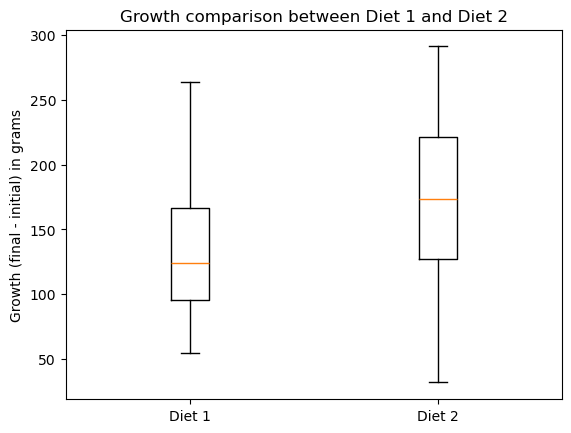

Text(0.5, 1.0, 'Normal Q–Q Plot')

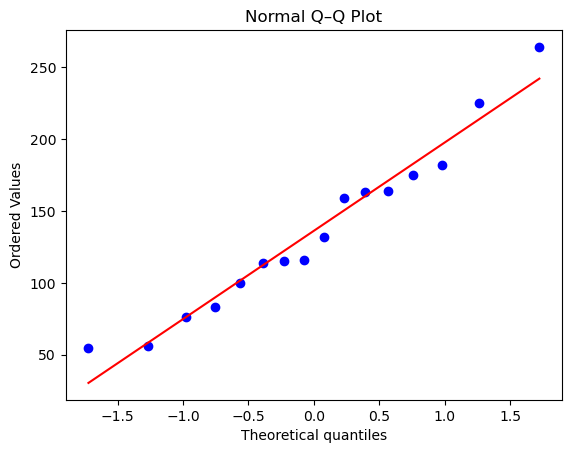

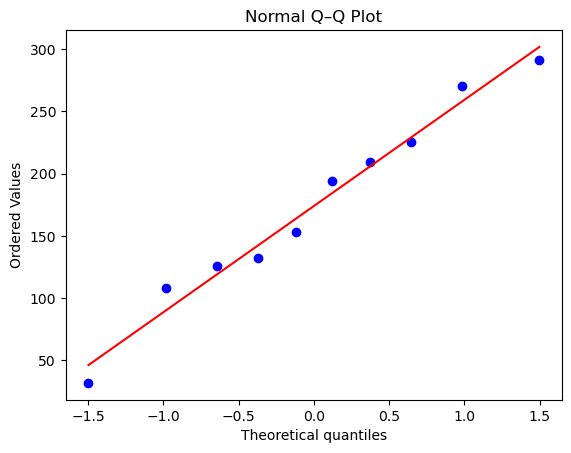

In [27]:
fig=plt.figure()
plt.boxplot([g1['growth'], g2['growth']], labels=['Diet 1','Diet 2']) #boxplot
plt.ylabel("Growth (final - initial) in grams")
plt.title("Growth comparison between Diet 1 and Diet 2")
plt.show()
fig2=plt.figure()
stats.probplot(g1['growth'], dist="norm", plot=plt) #qq plots
plt.title("Normal Q–Q Plot")
fig3=plt.figure()
stats.probplot(g2['growth'], dist="norm", plot=plt)
plt.title("Normal Q–Q Plot")

From the QQ plots it seems that the values are normally distributed.

In order to confirm this intuition the **Shapiro-Wilk** will be used (the critical p-value is fixed at 0.05). This test is particulary useful with samples of small dimension (in our case n_1 =16 and n_2=10)

In [28]:
s1, p1= stats.shapiro(g1['growth']) #Shapiro-Wilk test
print('The p-value of Shapiro test for the first group is:', p1)
if p1 < 0.05:
    print("Significant difference between normal distribution and set Diet 1\n")
else:
    print("No significant difference between normal distribution and our set Diet 1\n")
s2, p2=stats.shapiro(g2['growth'])
print('The p-value of the Shapiro test for the second group is:', p2)
if p2 < 0.05:
    print("Significant difference between normal distribution and set Diet 2\n")
else:
    print("No significant difference between normal distribution and our set Diet 2\n")

The p-value of Shapiro test for the first group is: 0.5939970452888794
No significant difference between normal distribution and our set Diet 1

The p-value of the Shapiro test for the second group is: 0.9451197833773345
No significant difference between normal distribution and our set Diet 2



It is immediate to remark that our samples are strongly likely to be normally distributed.

Furthermore it is clear that our populations are independent between each other.

Hence the **Welch's t-test** will be applied in order to check if there is statistical relation between these two groups.

In [29]:
t_statistic, p_value = stats.ttest_ind(g1['growth'], g2['growth'], equal_var=False)

print("The t-value of the Welch's t-test is:", t_statistic)
print("The p-value of the Welch's t-test is:", p_value)

if p_value < 0.05:
    print("Significant difference between Diet 1 and Diet 2 growth\n")
else:
    print("No significant difference between Diet 1 and Diet 2 growth\n")

The t-value of the Welch's t-test is: -1.3041686919559587
The p-value of the Welch's t-test is: 0.21154031062311854
No significant difference between Diet 1 and Diet 2 growth



Hence we get that we mantain the null hypotesis, i.e. there is **no statistical significant difference** between these two groups. Let us also compute the confidence interval.

In [30]:
diff_mean=abs(g1['growth'].mean() - g2['growth'].mean()) #mean difference
se = (((g1['growth'].std())**2)/len(g1['growth']) + ((g2['growth'].std())**2)/len(g2['growth']))**0.5 #standard error
df = ((g1['growth'].std())/(len(g1['growth'])) + (g2['growth'].std())/len(g2['growth']))**2 / (((g1['growth'].std())**2)/
    ((len(g1['growth']))**2*(len(g1['growth'])-1)) + ((g2['growth'].std())**2)/((len(g2['growth']))**2*((len(g2['growth']))-1))) #Welch–Satterthwaite parameter
tcrit = stats.t.ppf(0.975, df)  #critical t
ci = (diff_mean - tcrit*se, diff_mean + tcrit*se) #confidence interval
print("Mean difference:", diff_mean)
print("Standard error:", se)
print("Welch–Satterthwaite parameter:",df) 
print("Confidence interval:",ci)

Mean difference: 37.8125
Standard error: 28.9935651984482
Welch–Satterthwaite parameter: 17.10981845428326
Confidence interval: (-23.32868062679801, 98.95368062679802)


In [31]:
diff_mean=abs(g1['growth'].mean() - g2['growth'].mean()) #mean difference
se = (((g1['growth'].std())**2)/len(g1['growth']) + ((g2['growth'].std())**2)/len(g2['growth']))**0.5 #standard error
df = ((g1['growth'].std())/(len(g1['growth'])) + (g2['growth'].std())/len(g2['growth']))**2 / (((g1['growth'].std())**2)/
    ((len(g1['growth']))**2*(len(g1['growth'])-1)) + ((g2['growth'].std())**2)/((len(g2['growth']))**2*((len(g2['growth']))-1))) #Welch–Satterthwaite parameter
tcrit = stats.t.ppf(0.95, df)  #critical t
ci = (diff_mean - tcrit*se, diff_mean + tcrit*se) #confidence interval
print("Mean difference:", diff_mean)
print("Standard error:", se)
print("Welch–Satterthwaite parameter:",df) 
print("Confidence interval:",ci)

Mean difference: 37.8125
Standard error: 28.9935651984482
Welch–Satterthwaite parameter: 17.10981845428326
Confidence interval: (-12.606282726865977, 88.23128272686597)


Since 0 is contained in the confidence intervals then the choice about null hypotesis is confirmed.